# Predictive Modelling

---

#### Data scraped from SGCarMart. Refer to :
* "Scraping from SGCarMart" notebook for the scraping process
* "Data Cleaning" notebook for the data cleaning process
* "EDA" notebook for the Exploratory Data Analysis

In [1]:
# Generic libraries:
import pandas as pd
import random
import csv
import re
import matplotlib.pyplot as plt 
import numpy as np
from datetime import date

In [2]:
# Model libraries:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [ ]:
!pip install xgboost

In [3]:
# Scaler libraries:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [4]:
# evaluation libraries:
from sklearn.model_selection import train_test_split
import math
import sklearn.metrics
from sklearn.metrics import r2_score

In [5]:
car_df= pd.read_csv('./car_df_for_modelling.csv')
car_df= car_df.drop('Unnamed: 0', axis=1)

In [6]:
car_df.shape

(10331, 28)

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10331 entries, 0 to 10330
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                10331 non-null  object 
 1   Posted On          10331 non-null  object 
 2   car_make           10331 non-null  object 
 3   Seller             10331 non-null  object 
 4   seller_type        10331 non-null  int64  
 5   Price              10331 non-null  float64
 6   dereg_value        10331 non-null  float64
 7   COE                10331 non-null  float64
 8   Manufactured       10331 non-null  int64  
 9   car_age            10331 non-null  int64  
 10  road_tax_per_yr    10331 non-null  float64
 11  OMV                10331 non-null  float64
 12  ARF                10331 non-null  float64
 13  total_mileage      10331 non-null  float64
 14  Total_COE_left     10331 non-null  int64  
 15  engine_cap_cc      10287 non-null  float64
 16  curb_weight_kg     102

#### Prediction of use car price is a regression problem. The following regression models were attempted:
* Linear Regression
* K-Neighbors Regression
* Random Forest Regression
* Support Vector Machine Regression
* Lasso Regression
* Ridge Regression
* XGBoost Regression

In [8]:
table= {'features selected': ['dereg_value', 'road_tax_per_yr', 'OMV', 'ARF', 'total_mileage', 'Total_COE_left', 
                              'engine_cap_cc', 'Power_kw', 'car_age', 'price_dereg_ratio', 'brand_category', 
                              'owner_number', 'car_category'], 
        'correlation with Price': [0.89, 0.54, 0.79, 0.86, -0.41, 0.43, 0.6, 0.66, -0.36, 0.07, -0.33, -0.2, 0.35]}

pd.DataFrame(table)

,features selected,correlation with Price
0,dereg_value,0.89
1,road_tax_per_yr,0.54
2,OMV,0.79
3,ARF,0.86
4,total_mileage,-0.41
5,Total_COE_left,0.43
6,engine_cap_cc,0.60
7,Power_kw,0.66
8,car_age,-0.36
9,price_dereg_ratio,0.07


#### 'engine_cap_cc' is not included in the pool of selected features because it does not apply to electric cars and has high number of null values in the column. 

In [9]:
selected_features1= ['dereg_value', 'OMV', 'ARF', 'road_tax_per_yr', 'total_mileage', 'Total_COE_left', 'Power_kw']

# 'total_mileage' 'Total_COE_left' were excluded as they are weaker features.
selected_features2= ['dereg_value', 'OMV', 'ARF', 'road_tax_per_yr', 'Power_kw'] 

# 'car_category' and 'car_age' were added.
selected_features3= ['dereg_value', 'OMV', 'ARF', 'road_tax_per_yr', 'total_mileage', 'Total_COE_left', 'Power_kw', 'car_age', 
                     'car_category']

# 'car_category', 'car_age' and 'owner_number' were added.
selected_features4= ['dereg_value', 'OMV', 'ARF', 'road_tax_per_yr', 'total_mileage', 'Total_COE_left', 'Power_kw', 'car_age', 
                     'car_category', 'owner_number']

In [10]:
length= [len(selected_features1), len(selected_features2), len(selected_features3), len(selected_features4)]
length

[7, 5, 9, 10]

## <font color= 'red'> Linear Regression

In [12]:
# Selecting the best set of features:

# define X and y:
X_1 = car_df[selected_features1]
X_2 = car_df[selected_features2]
X_3 = car_df[selected_features3]
X_4 = car_df[selected_features4]
X_list = [X_1, X_2, X_3, X_4]
R2_score_test= []
RMSE_score_test= []
R2_score_train= []
RMSE_score_train= []

# define model and split data to train and test sets:

for X in X_list:
    y = car_df.Price
    model = LinearRegression()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

    # Use standardscaler to standardize the data set:

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # fit the train data set to the model:

    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    # calculate R2 and RMSE:

    coefficient_of_dermination_test = r2_score(y_test, y_pred)
    coefficient_of_dermination_train = r2_score(y_train, y_pred_train)
    R2_score_test.append(coefficient_of_dermination_test)
    R2_score_train.append(coefficient_of_dermination_train)
    
    MSE_test = sklearn.metrics.mean_squared_error(y_test, y_pred)  
    RMSE_test = math.sqrt(MSE_test)
    RMSE_score_test.append(RMSE_test)
    
    MSE_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)  
    RMSE_train = math.sqrt(MSE_train)
    RMSE_score_train.append(RMSE_train)

lin_reg= pd.DataFrame({'selected_features_set': ['selected_features1', 'selected_features2', 
                                                 'selected_features3', 'selected_features4'],
                       'R2_test': R2_score_test,
                       'RMSE_test': RMSE_score_test,
                       'R2_train': R2_score_train,
                       'RMSE_train': RMSE_score_train})

lin_reg

,selected_features_set,R2_test,RMSE_test,R2_train,RMSE_train
0,selected_features1,0.887116,23313.127268,0.887433,23421.622619
1,selected_features2,0.813478,29967.454975,0.813715,30130.179621
2,selected_features3,0.893339,22661.462784,0.893730,22757.178723
3,selected_features4,0.893462,22648.358246,0.893984,22729.936323


In [13]:
best_lin_reg= {'model': 'Linear Regression', 
               'R2_test': max(R2_score_test),
               'RMSE_test': float(lin_reg[lin_reg['R2_test'] == max(R2_score_test)]['RMSE_test']),
               'Parameter': 'nil',
               'R2_train': float(lin_reg[lin_reg['R2_test'] == max(R2_score_test)]['R2_train'])}
best_lin_reg

{'model': 'Linear Regression',
 'R2_test': 0.8934620608744687,
 'RMSE_test': 22648.35824631946,
 'Parameter': 'nil',
 'R2_train': 0.8939839325167952}

#### selected_features3 is the best performing pool of features. 

## <font color= 'red'> K-Nearest Neighbors Regression

In [16]:
# define X and y:
X = car_df[selected_features3]
y = car_df.Price

# define model and split data to train and test sets:

model = KNeighborsRegressor(n_neighbors=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

# Use standardscaler to standardize the data set:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model using the training data and training targets
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

# calculate R2 and RMSE:

coefficient_of_dermination = r2_score(y_test, y_pred)

MSE = sklearn.metrics.mean_squared_error(y_test, y_pred)  
RMSE = math.sqrt(MSE)

print(f"K-Nearest Neighbors Regression (k=5) has a R2 score of {coefficient_of_dermination} and a RMSE of {RMSE}.")

K-Nearest Neighbors Regression (k=5) has a R2 score of 0.9627313804025556 and a RMSE of 13395.41687676941.


### Comparing different methods of scaler:

In [14]:
# define X and y:
X = car_df[selected_features3]
y = car_df.Price

# define model and split data to train and test sets:

model = KNeighborsRegressor(n_neighbors=5, weights='distance', p= 1)

scaler_1 = QuantileTransformer(output_distribution="normal")
scaler_2 = QuantileTransformer(output_distribution="uniform")
scaler_3 = RobustScaler(quantile_range=(25, 75))
scaler_4 = PowerTransformer(method="yeo-johnson")
scaler_5 = StandardScaler()

scaler_list= [scaler_1, scaler_2, scaler_3, scaler_4, scaler_5]
R2_score_test= []
RMSE_score_test= []
R2_score_train= []
RMSE_score_train= []

for scaler in scaler_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    coefficient_of_dermination_test = r2_score(y_test, y_pred)
    coefficient_of_dermination_train = r2_score(y_train, y_pred_train)
    R2_score_test.append(coefficient_of_dermination_test)
    R2_score_train.append(coefficient_of_dermination_train)
    
    MSE_test = sklearn.metrics.mean_squared_error(y_test, y_pred)  
    RMSE_test = math.sqrt(MSE_test)
    RMSE_score_test.append(RMSE_test)
    
    MSE_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)  
    RMSE_train = math.sqrt(MSE_train)
    RMSE_score_train.append(RMSE_train)
    
scaler_performance= pd.DataFrame({'scaler': scaler_list,
                                  'R2_test': R2_score_test,
                                  'RMSE_test': RMSE_score_test,
                                  'R2_train': R2_score_train,
                                  'RMSE_train': RMSE_score_train})
scaler_performance

,scaler,R2_test,RMSE_test,R2_train,RMSE_train
0,QuantileTransformer(output_distribution='normal'),0.971396,11735.489586,0.999986,262.514659
1,QuantileTransformer(),0.970772,11862.758485,0.999986,262.514659
2,"RobustScaler(quantile_range=(25, 75))",0.964005,13164.559732,0.999986,262.514659
3,PowerTransformer(),0.970629,11891.781933,0.999986,262.514659
4,StandardScaler(),0.968313,12351.661529,0.999986,262.514659


In [15]:
scaler_performance[scaler_performance['R2_test'] == scaler_performance['R2_test'].max()]

,scaler,R2_test,RMSE_test,R2_train,RMSE_train
0,QuantileTransformer(output_distribution='normal'),0.971396,11735.489586,0.999986,262.514659


In [16]:
# define X and y:
X = car_df[selected_features3]
y = car_df.Price

# define model and split data to train and test sets:

model = KNeighborsRegressor(n_neighbors=5, weights='distance', p= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

scaler = QuantileTransformer(output_distribution='normal')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

coefficient_of_dermination = r2_score(y_test, y_pred)
    
MSE = sklearn.metrics.mean_squared_error(y_test, y_pred)  
RMSE = math.sqrt(MSE)

print(RMSE, coefficient_of_dermination)

11735.489585626161 0.9713955722192951


#### <font color= 'red'> Conclusion: QuantileTransformer(output_distribution="normal") outperforms the other scalers.

In [17]:
# optimizing the n_neighbors number and other hyperparameters:

X = car_df[selected_features3]
y = car_df.Price

k_list= []
R2_score_test= []
RMSE_score_test= []
R2_score_train= []
RMSE_score_train= []

for i in range(20):
    k= 3 + 2*i
    k_list.append(k)

for k in k_list:
    
    model = KNeighborsRegressor(n_neighbors=k, weights='distance', p= 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)
    
    scaler = QuantileTransformer(output_distribution='normal')
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    coefficient_of_dermination_test = r2_score(y_test, y_pred)
    coefficient_of_dermination_train = r2_score(y_train, y_pred_train)
    R2_score_test.append(coefficient_of_dermination_test)
    R2_score_train.append(coefficient_of_dermination_train)
    
    MSE_test = sklearn.metrics.mean_squared_error(y_test, y_pred)  
    RMSE_test = math.sqrt(MSE_test)
    RMSE_score_test.append(RMSE_test)
    
    MSE_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)  
    RMSE_train = math.sqrt(MSE_train)
    RMSE_score_train.append(RMSE_train)
    
knn_reg_df= pd.DataFrame({'n_neighbors': k_list,
                          'R2_test': R2_score_test,
                          'RMSE_test': RMSE_score_test,
                          'R2_train': R2_score_train,
                          'RMSE_train': RMSE_score_train})
knn_reg_df

,n_neighbors,R2_test,RMSE_test,R2_train,RMSE_train
0,3,0.969604,12097.322465,0.999986,262.514659
1,5,0.971396,11735.489586,0.999986,262.514659
2,7,0.971506,11712.746305,0.999986,262.514659
3,9,0.971115,11792.879526,0.999986,262.514659
4,11,0.970909,11834.876665,0.999986,262.514659
5,13,0.970194,11979.476996,0.999986,262.514659
6,15,0.969861,12046.172854,0.999986,262.514659
7,17,0.969613,12095.602963,0.999986,262.514659
8,19,0.969372,12143.446292,0.999986,262.514659
9,21,0.969100,12197.212347,0.999986,262.514659


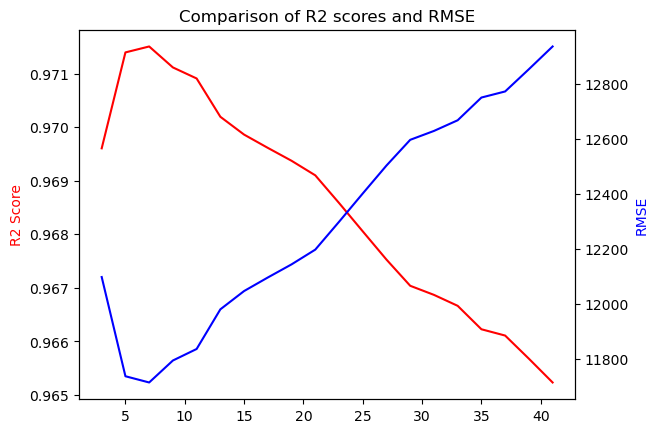

In [18]:
# create the first axis
fig, ax1 = plt.subplots()

# plot the first dataset on the first axis
ax1.plot(knn_reg_df['n_neighbors'], knn_reg_df['R2_test'], color='red')
ax1.set_ylabel('R2 Score', color='red')

# create the second axis
ax2 = ax1.twinx()

# plot the second dataset on the second axis
ax2.plot(knn_reg_df['n_neighbors'], knn_reg_df['RMSE_test'], color='blue')
ax2.set_ylabel('RMSE', color='blue')

# set the title of the plot
plt.title('Comparison of R2 scores and RMSE')

# show the plot
plt.show()

In [19]:
best_knn= {'model': 'K-Nearest Neighbor Regression', 
           'R2_test': max(R2_score_test),
           'RMSE_test': float(knn_reg_df[knn_reg_df['R2_test'] == max(R2_score_test)]['RMSE_test']),
           'Parameter': f"k={int(knn_reg_df[knn_reg_df['R2_test'] == max(R2_score_test)]['n_neighbors'])}",
           'R2_train': float(knn_reg_df[knn_reg_df['R2_test'] == max(R2_score_test)]['R2_train'])}
best_knn

{'model': 'K-Nearest Neighbor Regression',
 'R2_test': 0.9715063350682458,
 'RMSE_test': 11712.746305333036,
 'Parameter': 'k=7',
 'R2_train': 0.999985858926774}

## <font color= 'red'> Random Forest Regression

In [21]:
# optimizing the n_estimators number:

k_list= []
R2_score_test= []
RMSE_score_test= []
R2_score_train= []
RMSE_score_train= []

for i in range(1, 11):
    k= 150*i
    k_list.append(k)
    
X = car_df[selected_features3]
y = car_df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

for k in k_list:
    model = RandomForestRegressor(n_estimators = k, random_state = 42)
       
    scaler = QuantileTransformer(output_distribution="normal")
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    coefficient_of_dermination_test = r2_score(y_test, y_pred)
    coefficient_of_dermination_train = r2_score(y_train, y_pred_train)
    R2_score_test.append(coefficient_of_dermination_test)
    R2_score_train.append(coefficient_of_dermination_train)
    
    MSE_test = sklearn.metrics.mean_squared_error(y_test, y_pred)  
    RMSE_test = math.sqrt(MSE_test)
    RMSE_score_test.append(RMSE_test)
    
    MSE_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)  
    RMSE_train = math.sqrt(MSE_train)
    RMSE_score_train.append(RMSE_train)
    
rf_reg_df= pd.DataFrame({'n_estimators': k_list,
                         'R2_test': R2_score_test,
                         'RMSE_test': RMSE_score_test,
                         'R2_train': R2_score_train,
                         'RMSE_train': RMSE_score_train})
rf_reg_df

,n_estimators,R2_test,RMSE_test,R2_train,RMSE_train
0,150,0.964835,13088.557503,0.995586,4626.226385
1,300,0.965029,13052.561257,0.995720,4555.781460
2,450,0.965024,13053.429529,0.995703,4564.616714
3,600,0.965071,13044.580655,0.995734,4548.207787
4,750,0.964978,13062.063128,0.995741,4544.349505
5,900,0.964940,13069.018899,0.995743,4543.529220
6,1050,0.964918,13073.242943,0.995745,4542.088353
7,1200,0.964980,13061.691996,0.995748,4540.864709
8,1350,0.965017,13054.741761,0.995745,4542.373548
9,1500,0.964994,13059.092385,0.995742,4543.953290


In [22]:
best_rf= {'model': 'Random Forest Regression', 
           'R2_test': max(R2_score_test),
           'RMSE_test': float(rf_reg_df[rf_reg_df['R2_test'] == max(R2_score_test)]['RMSE_test']),
           'Parameter': f"n_estimators={int(rf_reg_df[rf_reg_df['R2_test'] == max(R2_score_test)]['n_estimators'])}",
           'R2_train': float(rf_reg_df[rf_reg_df['R2_test'] == max(R2_score_test)]['R2_train'])}
best_rf

{'model': 'Random Forest Regression',
 'R2_test': 0.9650714026169526,
 'RMSE_test': 13044.580654662544,
 'Parameter': 'n_estimators=600',
 'R2_train': 0.9957338893180365}

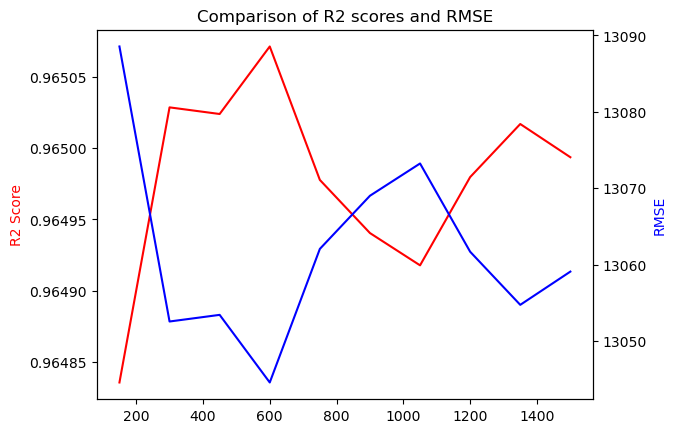

In [23]:
# create the first axis
fig, ax1 = plt.subplots()

# plot the first dataset on the first axis
ax1.plot(rf_reg_df['n_estimators'], rf_reg_df['R2_test'], color='red')
ax1.set_ylabel('R2 Score', color='red')

# create the second axis
ax2 = ax1.twinx()

# plot the second dataset on the second axis
ax2.plot(rf_reg_df['n_estimators'], rf_reg_df['RMSE_test'], color='blue')
ax2.set_ylabel('RMSE', color='blue')

# set the title of the plot
plt.title('Comparison of R2 scores and RMSE')

# show the plot
plt.show()

## <font color= 'red'> Support Vector Machine Regression

In [42]:
# define X and y:
X = car_df[selected_features3]
y = car_df.Price

# define model and split data to train and test sets:

model = SVR(kernel = 'linear')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Use scaler to standardize the data set:

scaler = QuantileTransformer(output_distribution="normal")
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model using the training data and training targets
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

# calculate R2 and RMSE:

coefficient_of_dermination = r2_score(y_test, y_pred)

MSE = sklearn.metrics.mean_squared_error(y_test, y_pred)  
RMSE = math.sqrt(MSE)

print(f"SVM Regression has a R2 score of {coefficient_of_dermination} and a RMSE of {RMSE}.")

SVM Regression has a R2 score of 0.46822740783831807 and a RMSE of 51961.41386377016.


In [43]:
best_svm= {'model': 'Support Vector Machine Regression', 
           'R2_test': coefficient_of_dermination,
           'RMSE_test': RMSE,
           'Parameter': 'kernel= linear'}
best_svm

{'model': 'Support Vector Machine Regression',
 'R2_test': 0.46822740783831807,
 'RMSE_test': 51961.41386377016,
 'Parameter': 'kernel= linear'}

#### Conclusion: SVM Regression is not a good model for this dataset. 

## <font color= 'red'> Lasso Regression

In [40]:
# define X and y:
X = car_df[selected_features3]
y = car_df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

R2_score= []
RMSE_score= []

# alpha is the regularization parameter that controls the strength of the penalty applied to the coefficients.
alpha_list= [0.05, 0.1, 0.2, 0.3]

for i in alpha_list:

    model = Lasso(alpha=i) 

    scaler = QuantileTransformer(output_distribution="normal")
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    coefficient_of_dermination = r2_score(y_test, y_pred)
    R2_score.append(coefficient_of_dermination)

    MSE = sklearn.metrics.mean_squared_error(y_test, y_pred)  
    RMSE = math.sqrt(MSE)
    RMSE_score.append(RMSE)

lasso_df= pd.DataFrame({'alpha': alpha_list, 'R2': R2_score, 'RMSE': RMSE_score})
lasso_df

,alpha,R2,RMSE
0,0.05,0.803631,30748.269714
1,0.10,0.803979,30721.037010
2,0.20,0.804028,30717.191796
3,0.30,0.804026,30717.362673


In [41]:
best_lasso= {'model': 'Lasso Regression', 
           'R2_test': max(R2_score),
           'RMSE_test': float(lasso_df[lasso_df['R2'] == max(R2_score)]['RMSE']),
           'Parameter': f"alpha= {float(lasso_df[lasso_df['R2'] == max(R2_score)]['alpha'])}"}
best_lasso

{'model': 'Lasso Regression',
 'R2_test': 0.8040280751011645,
 'RMSE_test': 30717.191795942417,
 'Parameter': 'alpha= 0.2'}

#### Conclusion: Lasso Regression is not a good model for this dataset.

## <font color= 'red'> Ridge Regression

In [38]:
# define X and y:
X = car_df[selected_features3]
y = car_df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

R2_score= []
RMSE_score= []

# alpha is the regularization parameter that controls the strength of the penalty applied to the coefficients.
alpha_list= [0.05, 0.1, 0.2, 0.3]

for i in alpha_list:

    model = Ridge(alpha=i) 

    scaler = QuantileTransformer(output_distribution="normal")
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    coefficient_of_dermination = r2_score(y_test, y_pred)
    R2_score.append(coefficient_of_dermination)

    MSE = sklearn.metrics.mean_squared_error(y_test, y_pred)  
    RMSE = math.sqrt(MSE)
    RMSE_score.append(RMSE)

ridge_df= pd.DataFrame({'alpha': alpha_list, 'R2': R2_score, 'RMSE': RMSE_score})
ridge_df

,alpha,R2,RMSE
0,0.05,0.803631,30748.264500
1,0.10,0.803979,30721.024871
2,0.20,0.804028,30717.179558
3,0.30,0.804026,30717.351616


In [39]:
best_ridge= {'model': 'Ridge Regression', 
           'R2_test': max(R2_score),
           'RMSE_test': float(ridge_df[ridge_df['R2'] == max(R2_score)]['RMSE']),
           'Parameter': f"alpha= {float(ridge_df[ridge_df['R2'] == max(R2_score)]['alpha'])}"}
best_ridge

{'model': 'Ridge Regression',
 'R2_test': 0.8040282312503519,
 'RMSE_test': 30717.179558308137,
 'Parameter': 'alpha= 0.2'}

#### Conclusion: Ridge Regression is not a good model for this dataset.

## <font color= 'red'> XGBoost Regression

In [30]:
# define X and y:
X = car_df[selected_features3]
y = car_df.Price

# define model and split data to train and test sets:

max_depth_list = [9, 12, 15]
n_estimators_list = [100, 200, 300, 400, 500]
R2_score_test= []
RMSE_score_test= []
R2_score_train= []
RMSE_score_train= []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

for i in n_estimators_list:
    
    for j in max_depth_list:
        params = {'objective': 'reg:squarederror', 'n_estimators': i, 'max_depth': j}
        model = xgb.XGBRegressor(**params)

        # Use scaler to standardize the data set:

        scaler = QuantileTransformer(output_distribution="normal")
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # fit the train data set to the model:

        model.fit(X_train, y_train)

        y_pred= model.predict(X_test)
        y_pred_train= model.predict(X_train)

        coefficient_of_dermination_test = r2_score(y_test, y_pred)
        coefficient_of_dermination_train = r2_score(y_train, y_pred_train)
        R2_score_test.append(coefficient_of_dermination_test)
        R2_score_train.append(coefficient_of_dermination_train)
    
        MSE_test = sklearn.metrics.mean_squared_error(y_test, y_pred)  
        RMSE_test = math.sqrt(MSE_test)
        RMSE_score_test.append(RMSE_test)
    
        MSE_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)  
        RMSE_train = math.sqrt(MSE_train)
        RMSE_score_train.append(RMSE_train)

In [31]:
xgb_df= pd.DataFrame({'max_depth': [9,9,9,9,9,12,12,12,12,12,15,15,15,15,15], 
                      'n_estimators': [100, 200, 300, 400, 500, 100, 200, 300, 400, 500, 100, 200, 300, 400, 500],
                      'R2_test': R2_score_test, 
                      'RMSE_test': RMSE_score_test,
                      'R2_train': R2_score_train,
                      'RMSE_train': RMSE_score_train})
xgb_df

,max_depth,n_estimators,R2_test,RMSE_test,R2_train,RMSE_train
0,9,100,0.973528,11289.671815,0.999267,1890.235363
1,9,200,0.972578,11490.477100,0.999926,601.186547
2,9,300,0.970742,11868.726068,0.999983,286.972942
3,9,400,0.973525,11290.121007,0.999863,818.256050
4,9,500,0.972617,11482.272594,0.999984,278.792458
5,12,100,0.970792,11858.618721,0.999986,262.636270
6,12,200,0.973465,11303.084862,0.999957,458.870392
7,12,300,0.972148,11580.045874,0.999986,263.583425
8,12,400,0.971358,11743.146694,0.999986,262.515622
9,12,500,0.972946,11412.908446,0.999980,310.919366


In [33]:
best_xgb= {'model': 'XGBoost Regression', 
           'R2_test': max(R2_score_test),
           'RMSE_test': float(xgb_df[xgb_df['R2_test'] == max(R2_score_test)]['RMSE_test']),
           'Parameter': f"max_depth= {float(xgb_df[xgb_df['R2_test'] == max(R2_score_test)]['max_depth'])}, n_estimators= {float(xgb_df[xgb_df['R2_test'] == max(R2_score_test)]['n_estimators'])}",
           'R2_train': float(xgb_df[xgb_df['R2_test'] == max(R2_score_test)]['R2_train'])}
best_xgb

{'model': 'XGBoost Regression',
 'R2_test': 0.9735275903737632,
 'RMSE_test': 11289.671815075037,
 'Parameter': 'max_depth= 9.0, n_estimators= 100.0',
 'R2_train': 0.9992668260599624}

## Overall Performance

* Linear Regression
* K-Neighbors Regression
* Random Forest Regression
* Support Vector Machine Regression
* Lasso Regression
* Ridge Regression
* XGBoost Regression

In [51]:
best_of_all = [best_lin_reg, best_knn, best_rf, best_svm, best_lasso, best_ridge, best_xgb]

model_list= []
R2_score = []
RMSE_score = []
param_list= []

for i in range(len(best_of_all)):
    model_list.append(best_of_all[i]['model'])
    R2_score.append(best_of_all[i]['R2_test'])
    RMSE_score.append(best_of_all[i]['RMSE_test'])
    param_list.append(best_of_all[i]['Parameter'])
    
model_performance= pd.DataFrame({'model': model_list, 
                                 'R2_test': R2_score, 
                                 'RMSE_test': RMSE_score,
                                 'R2_train': [0.89398, 0.999986, 0.995733, 'nil', 'nil', 'nil', 0.999266],
                                 'Parameter': param_list})
model_performance

,model,R2_test,RMSE_test,R2_train,Parameter
0,Linear Regression,0.893462,22648.358246,0.89398,nil
1,K-Nearest Neighbor Regression,0.971506,11712.746305,0.999986,k=7
2,Random Forest Regression,0.965071,13044.580655,0.995733,n_estimators=600
3,Support Vector Machine Regression,0.468227,51961.413864,nil,kernel= linear
4,Lasso Regression,0.804028,30717.191796,nil,alpha= 0.2
5,Ridge Regression,0.804028,30717.179558,nil,alpha= 0.2
6,XGBoost Regression,0.973528,11289.671815,0.999266,"max_depth= 9.0, n_estimators= 100.0"


In [45]:
average_car_price= car_df['Price'].mean()
average_car_price

107081.5621914626

In [47]:
#Comparison of RMSE with the average car price. 

100* (model_performance['RMSE_test'].min()/car_df['Price'].mean())

10.54305856585191

In [41]:
model_performance.to_csv('model_performance.csv')